<a href="https://colab.research.google.com/github/ramnoa/PLP-PYTHON/blob/main/data_analysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***1.IMPORTING THE LIBRARIES***




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***2.EXPLATORY ANALYSIS***

In [ ]:
df = pd.read_csv('car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,Hero Passion X pro,2016,12417.55,33217,Petrol,Individual,Manual,0,11717.50
1,xcent,2017,10633.13,12905,Petrol,Dealer,Manual,0,9931.75
2,verna,2015,10881.40,62053,Diesel,Dealer,Manual,0,10180.25
3,ertiga,2016,11107.79,43897,Diesel,Dealer,Manual,0,10404.75
4,jazz,2016,10316.40,4108,Petrol,Dealer,Manual,0,9614.00


In [ ]:
#Checking whether we have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Car_Name       100000 non-null  object 
 1   Year           100000 non-null  int64  
 2   Present_Price  100000 non-null  float64
 3   Kms_Driven     100000 non-null  int64  
 4   Fuel_Type      100000 non-null  object 
 5   Seller_Type    100000 non-null  object 
 6   Transmission   100000 non-null  object 
 7   Owner          100000 non-null  int64  
 8   Selling_Price  100000 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [ ]:
#statistical
df.describe()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2014.059300,10454.815579,35544.731010,0.036080,9752.087633
std,2.592811,1497.176036,35908.164469,0.213913,1498.468367
min,2003.000000,3405.280000,606.000000,0.000000,2703.350000
25%,2013.000000,9406.007500,15760.000000,0.000000,8703.250000
50%,2015.000000,10628.705000,30595.500000,0.000000,9926.700000
75%,2016.000000,11639.782500,46476.000000,0.000000,10938.120000
max,2018.000000,12731.230000,502479.000000,3.000000,12028.000000


In [ ]:
df['Car_Name'].value_counts()

,count
Car_Name,
city,8919
corolla altis,4852
verna,4570
fortuner,3550
brio,3526
...,...
Suzuki Access 125,219
Hero Super Splendor,188
camry,183


In [ ]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Individual' 'Dealer']
['Manual' 'Automatic']
[0 1 3]


In [ ]:
df.groupby('Fuel_Type')['Present_Price'] .mean()

,Present_Price
Fuel_Type,
CNG,10590.604818
Diesel,10454.662791
Petrol,10453.677393


# ***3.VISUALIZATION***

/tmp/ipython-input-3268617016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fuel_Type', palette='viridis')


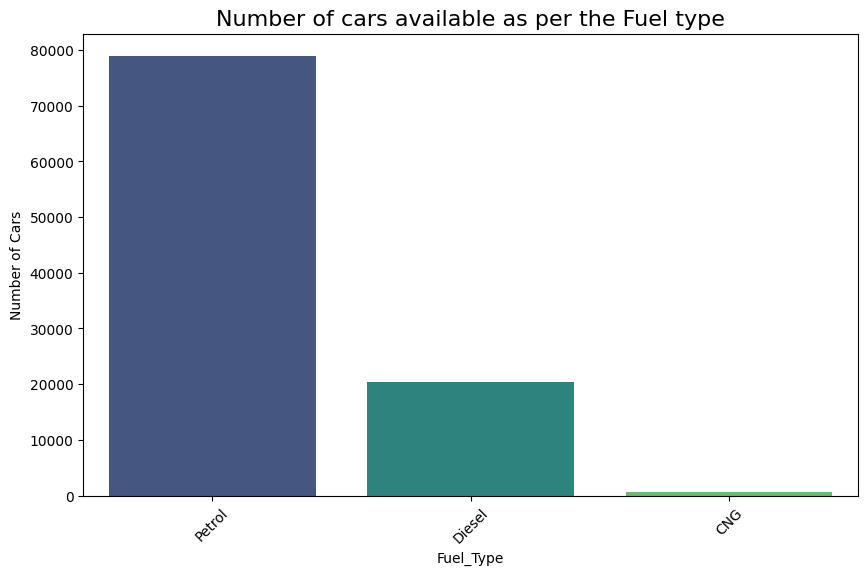

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fuel_Type', palette='viridis')
plt.title("Number of cars available as per the Fuel type", fontsize=16)
plt.xlabel("Fuel_Type")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2665730874.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Year', y='Present_Price', palette='Set2')


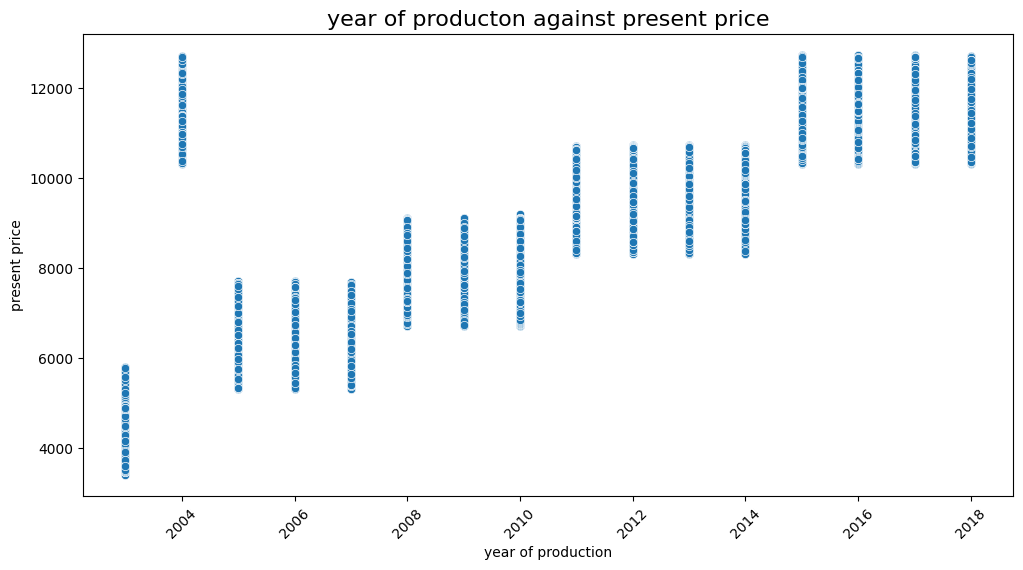

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Year', y='Present_Price', palette='Set2')
plt.title("year of producton against present price", fontsize=16)
plt.xlabel("year of production")
plt.ylabel("present price")
plt.xticks(rotation=45)
plt.show()

In [28]:
# 🔢 Correlation check
corr = df['Year'].corr(df['Present_Price'])
print(f"\nCorrelation between Treatment Duration and Satisfaction: {corr:.2f}")
print('The above shows that thereis much correlation between year of production and present price ')


Correlation between Treatment Duration and Satisfaction: 0.78
The above shows that thereis much correlation between year of production and present price 


# ***4.MODEL***

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

In [38]:
#converting categorical data to numeric
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission','Car_Name'], drop_first=True)

In [60]:
x = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
baseline_model = DummyRegressor(strategy='mean')
baseline_model.fit(x_train, y_train)
y_baseline_pred = baseline_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_baseline_pred))
print('R-squared:', r2_score(y_test, y_baseline_pred))

Mean Absolute Error: 1196.9422290256
R-squared: -1.6833480149580637e-05


In [41]:

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)

In [66]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Mean Absolute Error: 0.7847948403891689
R-squared: 0.9999992439596949


Text(0, 0.5, 'Predicted Selling Price')

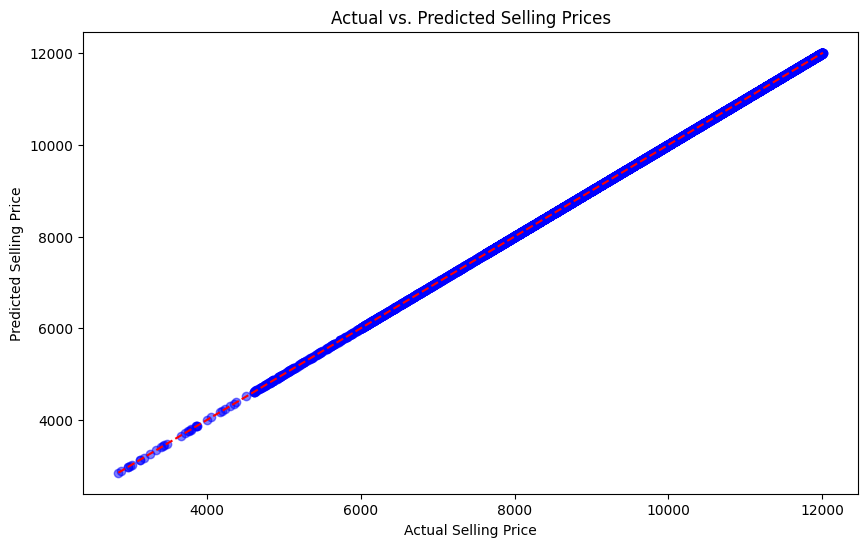

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

# **`5.COMMUNICATION`**

# We evaluated our regression model using Mean Absolute Error (MAE). The baseline model, which simply predicts the average value, had an MAE of 1196.94. In contrast, our trained model achieved an MAE of 0.78, reducing the error by over 1500 times. This demonstrates that the model effectively captures the relationship between the features and the target variable. Further testing on unseen data will help confirm generalizability.